In [1]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "4"

$minor
[1] "1.3"

$year
[1] "2022"

$month
[1] "03"

$day
[1] "10"

$`svn rev`
[1] "81868"

$language
[1] "R"

$version.string
[1] "R version 4.1.3 (2022-03-10)"

$nickname
[1] "One Push-Up"

In [2]:
 Sys.setenv(JAGS_HOME = "C:/Program Files/JAGS/JAGS-4.0.0")

In [3]:
.libPaths("C:/Users/jkmer/anaconda3/envs/r4-base/Library")

load.lib <- c("lme4",
              "ggplot2",
              "ggpubr",
              "directlabels",
              "RColorBrewer",
              "ggeffects",
              "see",
              "ggforce",
              "yarrr",
              "mgcv",
              "gratia",
              "tidymv",
              "visreg",
              "tidyverse",
              "dplyr",
              "directlabels",
              "confintr",
              "Kendall",
              "poolr",
              "broom",
              "modelr",
              "gdata",
             "LongituRF",
             "janitor",
             "zoo",
             "gt",
             "scales",
             "glue",
             "purrr",
             "htree",
             "JMbayes",
             "car",
             "agricolae",
             "flextable",
             "crul",
             "rempsyc"
) 

sapply(load.lib,require,character=TRUE)

Loading required package: lme4

Loading required package: Matrix

Loading required package: ggplot2

Loading required package: ggpubr

Loading required package: directlabels

Loading required package: RColorBrewer

Loading required package: ggeffects

Loading required package: see

Loading required package: ggforce

Loading required package: yarrr

Loading required package: jpeg

Loading required package: BayesFactor

Loading required package: coda

************
Welcome to BayesFactor 0.9.12-4.4. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************

Loading required package: circlize

circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014

lme4      ggplot2       ggpubr directlabels RColorBrewer    ggeffects 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
         see      ggforce        yarrr         mgcv       gratia       tidymv 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
      visreg    tidyverse        dplyr directlabels     confintr      Kendall 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
       poolr        broom       modelr        gdata    LongituRF      janitor 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
         zoo           gt       scales         glue        purrr        htree 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
     JMbayes          car    agricolae    flextable         crul      rempsyc 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE

In [4]:
# read in cleaned CLinical Severity Scores from Rett Natural History Study 5201 and 5211
clean <- read.csv('C:/Users/jkmer/Desktop/2023_css/20230201_CSS_5201_5211_cleaned.csv')

In [5]:
#convert id's etc to factors
clean$participant_id <- as.factor(clean$participant_id)
clean$childs_gender <- as.factor(clean$childs_gender)
clean$diagnosis <- as.factor(clean$diagnosis)
clean$grouping3 <- as.factor(clean$grouping3)
clean$visit <- as.factor(clean$visit)

In [6]:
#round age at visit to 0.1 years
clean$age <- round(clean$age_at_visit, 1)

In [7]:
#sort by age at visit within participant_id
 clean <- clean[
      with(clean, order(participant_id, age_at_visit)),]
        

In [8]:
#filter for females with a mecp2 mutation
fem <- clean %>% filter(childs_gender == "Female")
fempos <- fem %>% filter(grouping1_genetic_mutation == "MECP2 mutation")

Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


[1] 1451   43

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
`geom_smooth()` using method = 'gam'
Warning message:
"Removed 733 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 126 rows containing missing values (`geom_point()`)."


png 
  2

`geom_smooth()` using method = 'gam'
Warning message:
"Removed 733 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 126 rows containing missing values (`geom_point()`)."


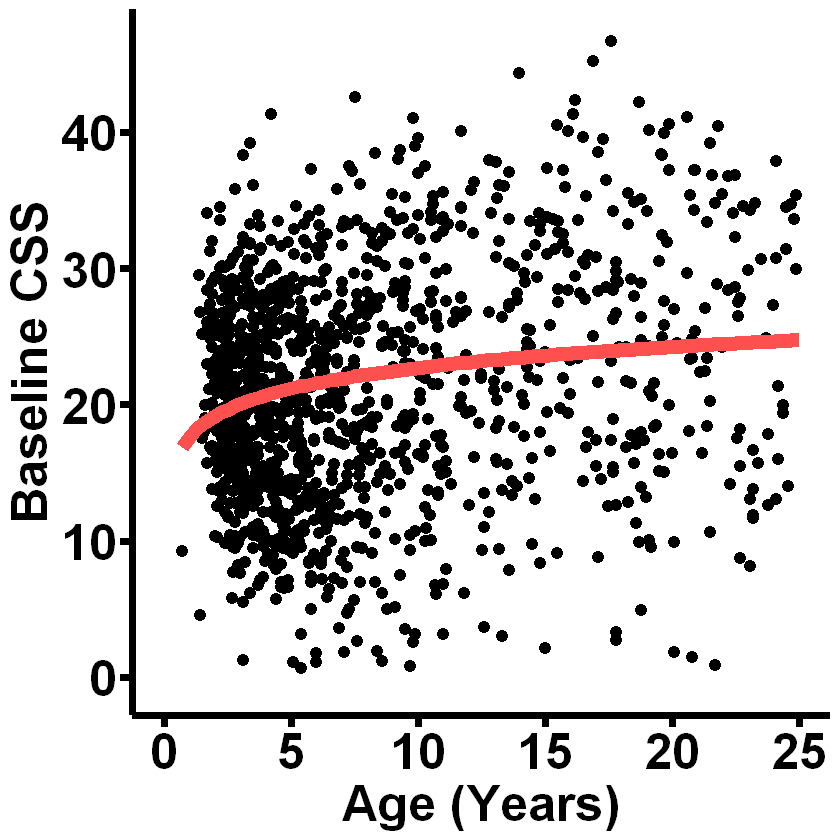

In [9]:
#plot of females in rnhs with a mecp2 mutation
testpal <- c('#ff00ff', '#33cc33', '#006600',
             '#33cccc', '#777b7e', '#663300',
             '#cc9900', '#ff5050', '#3366ff',
             '#6600cc', '#ff9900')

My_Theme = theme(
  axis.title.x = element_text(size = 30, face="bold", color = "black"),
  axis.text.x = element_text(size = 30, face="bold", color = "black"),
  axis.title.y = element_text(size = 30, face="bold", color = "black"),
  axis.text.y = element_text(size = 30, face="bold", color = "black"),  
  axis.line = element_line(size = 2, color = "black"),
  axis.ticks = element_line(size = 2, color = "black"),
  legend.text = element_text(size = 30, face="bold", color = "black"),
  axis.ticks.length=unit(0.1,"inch"),    
  legend.title = element_blank())

baseline <- fempos %>% group_by(participant_id) %>% slice(which.min(age_at_visit)) %>%
                             ungroup()
dim(baseline)

rnhs_summary_plot <- baseline %>%     
    ggplot() +
    geom_jitter(aes(x=age, y=total_score_clean), size = 3, width = 0.01, height = 0.5) +
    scale_colour_manual(values = testpal) +
    theme_classic() +
    My_Theme +
    ylab('Baseline CSS') +
    xlab('Age (Years)') +
    geom_smooth(data = fempos,
                aes(x = age, y = total_score_clean), 
                formula = y ~ log(x), size = 4, se = FALSE, color = '#ff5050') +
    xlim(0,25)

png(file="C:/Users/jkmer/Desktop/2023_css/rnhs_summary.png",
units="in", width=8, height=8, res=300)
rnhs_summary_plot
dev.off()

rnhs_summary_plot

png 
  2

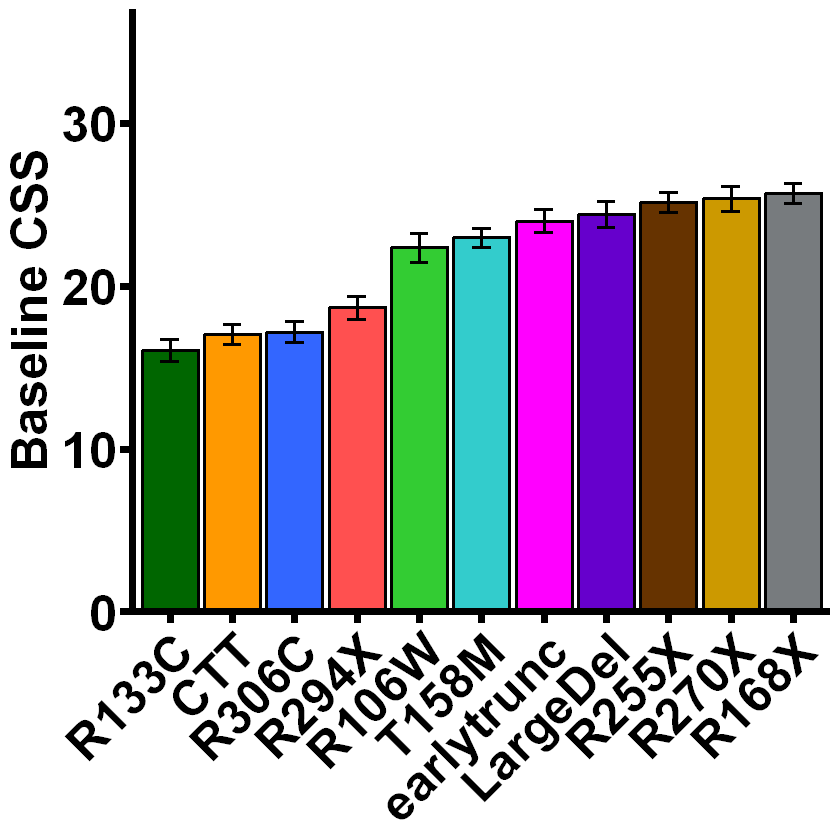

In [10]:
#plot common mutations to show differences in mean baseline severity
stderror <- function(x) sd(x)/sqrt(length(x))
baseline_mean <- baseline %>% group_by(grouping3) %>% mutate(mean = mean(total_score_clean)) %>%
                         mutate(sem = stderror(total_score_clean)) %>% ungroup() %>%
                         select(c(grouping3, mean, sem)) %>% unique()
                         


My_Theme = theme(
  axis.title.x = element_blank(), #element_text(size = 20, face="bold", color = "black"),
  axis.text.x = element_text(size = 30, face="bold", color = "black", angle = 45, vjust = 1, hjust=1),
  axis.title.y = element_text(size = 30, face="bold", color = "black"),
  axis.text.y = element_text(size = 30, face="bold", color = "black"),  
  axis.line=element_line(size = 2, color = "black"),
  axis.ticks = element_line(size = 2, color = "black"),
  axis.ticks.length=unit(0.1,"inch"),    
  legend.position = "none")

baseline_mean$grouping3 <- factor(baseline_mean$grouping3, levels = c("earlytrunc",
                                 "R106W",
                                 "R133C",
                                 "T158M",
                                 "R168X",
                                 "R255X",
                                 "R270X",
                                 "R294X",
                                 "R306C",
                                 "LargeDel",
                                 "CTT")) 
baseline_mean <-  baseline_mean %>% na.omit()

rnhs_meanplot <- ggplot(baseline_mean, aes(reorder(grouping3,mean), mean, fill = grouping3)) + 
      geom_bar(stat = "identity", color = "black", size=1, width=0.9) +
      #stat_summary(fun=mean, geom="bar") +
      geom_errorbar(aes(ymin=mean-sem, ymax=mean+sem), width=.3, size=1) +
      scale_y_continuous(expand = c(0,0),
                     limits = c(0,37)) +
          ylab("Baseline CSS") +
          theme_classic() +
          scale_fill_manual(values = testpal) +
          My_Theme

png(file="C:/Users/jkmer/Desktop/2023_css/rnhs_baseline_summary.png",
units="in", width=8, height=8, res=300)
rnhs_meanplot
dev.off()

rnhs_meanplot

In [11]:
fempos$age <- round(fempos$age_at_visit, digits = 1)
fempos25 <- fempos %>% filter(age <= 25)

In [12]:
femposatypical <- fempos25 %>% filter(diagnosis != "Classic")

In [13]:
femposatypical <- femposatypical %>% select(c(participant_id, grouping3)) %>% unique()

In [14]:
table(femposatypical$grouping3)


       CTT earlytrunc      Exon1   LargeDel       None    OtherPt      R106W 
        57         11          3         15          0         29          5 
     R133C      R168X      R255X      R270X      R294X      R306C     Splice 
        24         11         12         10         12         14          2 
     T158M 
         5 

In [15]:
femposclassic <- fempos %>% filter(diagnosis == "Classic")
length(unique(femposclassic$participant_id))

[1] 1213

In [16]:
femposclassic$age <- round(femposclassic$age_at_visit, digits = 1)
age25 <- femposclassic %>% filter(age <= 25)
length(unique(age25$participant_id))

[1] 1109

In [17]:
mutspec <- age25 %>% filter(grouping3 == "earlytrunc")
length(unique(mutspec$participant_id))

[1] 100

In [18]:
#for model development, focus on individuals with a classic diagnosis
#filter for classic cases in females under 25 years old
classic <- clean[clean$diagnosis == "Classic" ,]
females <- classic[classic$childs_gender == "Female" ,]
mecp2_pos <- females[females$grouping1_genetic_mutation == "MECP2 mutation" ,]
mecp2_pos$age <- round(mecp2_pos$age_at_visit, digits = 1)
mecp2_pos$lnage <- log(mecp2_pos$age)
mecp2_pos25 <- mecp2_pos[mecp2_pos$age<=25,]

In [19]:
#remove under-represented mutation groups
mecp2_pos25 <- mecp2_pos25 %>% filter(!grouping3 == 'OtherPt') %>% 
                               filter(!grouping3 == 'MISSING') %>% 
                               filter(!grouping3 == "Splice") %>%  
                               filter(!grouping3 == "Exon1")

mecp2_pos25 <- mecp2_pos25[!(is.na(mecp2_pos25$grouping3)), ]

In [20]:
length(unique(mecp2_pos25$participant_id))

[1] 1003

In [21]:
dim(mecp2_pos25)

[1] 5469   44

In [22]:
5469/1003

[1] 5.452642

In [23]:
unique(mecp2_pos25$grouping3)

[1] R168X      LargeDel   CTT        T158M      R306C      earlytrunc
 [7] R255X      R133C      R294X      R270X      R106W     
15 Levels: CTT earlytrunc Exon1 LargeDel None OtherPt R106W R133C ... T158M

## disaggregating within and between person effects by decomposing time in the log transformed model

In [24]:
#decompose logtime
mecp2_decomp <- mecp2_pos25 %>%
  group_by(participant_id) %>%
  summarize(mean_lnage = mean(lnage)) %>% 
  ungroup() %>%
  mutate(mean_lnage_ctr = scale(mean_lnage, scale = F)[,1],
         ctrval = attr(scale(mean_lnage, scale = F),"scaled:center")) %>% 
  right_join(mecp2_pos25, by = "participant_id") %>%
  mutate(duration = lnage - mean_lnage) %>% 
  select(participant_id, age, lnage, 
         mean_lnage, ctrval, mean_lnage_ctr, duration, 
         total_score_clean, grouping3)

In [25]:
#logtime decomp
log_decomp <- lme(fixed = total_score_clean ~ mean_lnage_ctr*duration*grouping3, 
             random = ~duration|participant_id,
             data = mecp2_decomp,
             correlation = corAR1(form = ~1|participant_id),
             method = "ML")

In [26]:
summary(log_decomp)

Linear mixed-effects model fit by maximum likelihood
  Data: mecp2_decomp 
      AIC      BIC   logLik
  27922.2 28245.93 -13912.1

Random effects:
 Formula: ~duration | participant_id
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev   Corr  
(Intercept) 5.795597 (Intr)
duration    2.758149 0.201 
Residual    2.490962       

Correlation Structure: AR(1)
 Formula: ~1 | participant_id 
 Parameter estimate(s):
      Phi 
0.3746984 
Fixed effects:  total_score_clean ~ mean_lnage_ctr * duration * grouping3 
                                                Value Std.Error   DF  t-value
(Intercept)                                 20.644386 0.5615795 4444 36.76129
mean_lnage_ctr                               3.367083 0.9703915  981  3.46982
duration                                     5.442157 0.6313405 4444  8.62000
grouping3earlytrunc                          4.503202 0.8267304  981  5.44700
grouping3LargeDel                            4.455011 0.8213295

In [27]:
#prediction of fixed effects
time <- seq(2,25, by = 0.1)
fixed_pred <- mecp2_pos25 %>% ungroup() %>% select(grouping3) %>% unique()
fixed_pred <- fixed_pred %>% group_by(grouping3) %>% tidyr::expand(age = time) %>% ungroup
fixed_pred$lnage <- log(fixed_pred$age)
fixed_pred$mean_lnage <- mean(log(time))
fixed_pred$mean_lnage_ctr <- 0
fixed_pred$duration <- fixed_pred$lnage - fixed_pred$mean_lnage

In [28]:
fixed_pred$pred <- predict(log_decomp, fixed_pred, level=0)

In [29]:
#logtime decomp model without inclusion of genotype for general modeling 
log_decomp_general <- lme(fixed = total_score_clean ~ mean_lnage_ctr*duration, 
             random = ~duration|participant_id,
             data = mecp2_decomp,
             correlation = corAR1(form = ~1|participant_id),
             method = "ML")

In [30]:
#prediction of fixed effects
time <- seq(2,25, by = 0.1)
fixed_pred_general <- as.data.frame(time)
colnames(fixed_pred_general) <- c('age')
fixed_pred_general$lnage <- log(fixed_pred_general$age)
fixed_pred_general$mean_lnage <- mean(log(time))
fixed_pred_general$mean_lnage_ctr <- 0
fixed_pred_general$duration <- fixed_pred_general$lnage - fixed_pred_general$mean_lnage

In [31]:
fixed_pred_general$pred <- predict(log_decomp_general, fixed_pred_general, level=0)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


png 
  2

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


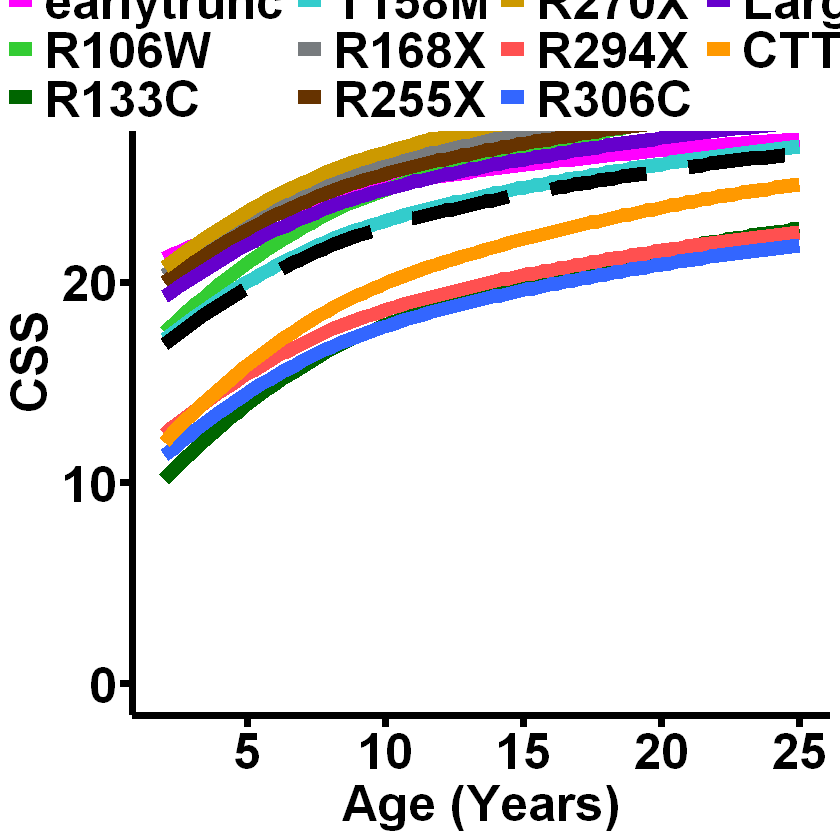

In [32]:
#col_pal <- unname(piratepal('xmen', length.out = 8))
#col_pal <-c("#999999", "#E69F00", "#56B4E9", "#009E73", 
 #          "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
#cbp1 <- c("#999999", "#E69F00", "#56B4E9", "#009E73",
 #         "#F0E442", "#0072B2", "#D55E00", "#CC79A7")


My_Theme = theme(
  axis.title.x = element_text(size = 30, face="bold", color = "black"),
  axis.text.x = element_text(size = 30, face="bold", color = "black"),
  axis.title.y = element_text(size = 30, face="bold", color = "black"),
  axis.text.y = element_text(size = 30, face="bold", color = "black"),  
  axis.line = element_line(size = 2, color = "black"),
  axis.ticks = element_line(size = 2, color = "black"),
  legend.text = element_text(size = 30, face="bold", color = "black"),
  axis.ticks.length=unit(0.1,"inch"),    
  legend.title = element_blank())

fixed_pred$grouping3 <-  factor(fixed_pred$grouping3, levels = c("earlytrunc",
                                 "R106W",
                                 "R133C",
                                 "T158M",
                                 "R168X",
                                 "R255X",
                                 "R270X",
                                 "R294X",
                                 "R306C",
                                 "LargeDel",
                                 "CTT")) 

logdecompplot <-  fixed_pred %>%
    ggplot() +
    geom_smooth(aes(x=age, y=pred, color = grouping3), size = 4, se = FALSE) +
    scale_colour_manual(values = testpal) +
    theme_classic() +
    My_Theme +
    guides(color=guide_legend(ncol=4)) +
    ylab('CSS') +
    xlab('Age (Years)') +
            theme(legend.position = c(0.5, 0.95)) +
    geom_smooth(data = fixed_pred_general,
                aes(x = age, y = pred), size = 4, se = FALSE, color = 'black', linetype = 11 ) +
    ylim(0,32)

png(file="C:/Users/jkmer/Desktop/2023_css/logdecompmodel_allmut.png",
units="in", width=10, height=16, res=300)
logdecompplot
dev.off()

logdecompplot

## Individual predictions from log decomp model using bayesian approach

In [33]:
#pull center value from training data set
ctr_val_train <- unique(mecp2_decomp$ctrval)

In [34]:
#predict decomposed model for all individuals with represented mutations in mecp2 regardless of diagnosis


#filter parent data for females with represented mecp2 mutations
females <- clean[clean$childs_gender == "Female" ,]
mecp2_pos <- females[females$grouping1_genetic_mutation == "MECP2 mutation" ,]
mecp2_pos$age <- round(mecp2_pos$age_at_visit, digits = 1)
mecp2_pos$lnage <- log(mecp2_pos$age)
mecp2_pos <- mecp2_pos %>% filter( age <= 25)
mecp2_pos$participant_id <- factor(mecp2_pos$participant_id)

#remove under represented mutation groupings
mecp2_pos <- mecp2_pos %>% filter(!grouping3 == 'OtherPt') %>% 
                               filter(!grouping3 == 'MISSING') %>% 
                               filter(!grouping3 == "Splice") %>%  
                               filter(!grouping3 == "Exon1")
mecp2_pos <- mecp2_pos[!(is.na(mecp2_pos$grouping3)), ]

#decompose age
mecp2_pos_decomp <- mecp2_pos %>%
  group_by(participant_id) %>%
  summarize(mean_lnage = mean(lnage)) %>% # calculates the mean age per person
  ungroup() %>%
mutate(mean_lnage_ctr = mean_lnage - ctr_val_train) %>% 
  right_join(mecp2_pos, by = "participant_id") %>% 
  mutate(duration = lnage - mean_lnage) %>%
  select(participant_id, age, lnage, 
         mean_lnage, mean_lnage_ctr, duration, 
         total_score_clean, grouping3)

#assign cntrval from training
mecp2_pos_decomp$ctrval <- ctr_val_train

#assign numeric factors to grouping3 in training and prediction - necessary for running JMbayes
mecp2_decomp$grp_3num <- as.factor(as.numeric(mecp2_decomp$grouping3))
mecp2_pos_decomp$grp_3num <- as.factor(as.numeric(mecp2_pos_decomp$grouping3))

#create vector of ages for prediction
time <- seq(2, 25, by = 0.1) #by = 1 for low resolution testing, by = 0.1 for actual production run
logtime <- log(time)
       
#create vector of participant_id's for predictions to be made on       
participant_ids <- unique(mecp2_pos_decomp$participant_id) #ref all diagnosis part_ids

#train log decomp model on classic diagnosis       
log_decomp <- lme(fixed = total_score_clean ~ mean_lnage_ctr*duration*grp_3num, 
             random = ~duration|participant_id,
             data = mecp2_decomp,
             correlation = corAR1(form = ~1|participant_id),
             method = "ML")      
       
#loop over participant_ids for all diagnosis, constructing new set of durations based on individual specific mean_lnage
all_pred = data.frame()
for (i in participant_ids){
     
        #filter all diagnosis for participant_id of interest
        tmp_new_dat <- mecp2_pos_decomp %>% filter(participant_id == i)
    
        #create vector of individual specific durations based on mean_lnage
        tmp_durations <- logtime - unique(tmp_new_dat$mean_lnage)
        
    
        #predict with JMbayes        
        indiv_pred <- IndvPred_lme(log_decomp, 
                           newdata = tmp_new_dat, 
                           timeVar = "duration", 
                           M = 500, 
                           return_data = FALSE, #set to false for forecasting, if export with dataframe, need to remove rows of original data                           seed = 321,
                           all_times = TRUE,
                           times = tmp_durations)

        #create data frame with individual and grouping3, assign ages of prediction, merge with predicted total_score
        pred <- tmp_new_dat %>% 
                select(c(participant_id,grouping3)) %>% unique() %>% 
                group_by(participant_id, grouping3) %>% expand(age = time) %>% ungroup()
        pred$pred <- indiv_pred$predicted_y
    
        #add individual predictions to output
        all_pred <- rbind(all_pred, pred)
    }

In [35]:
#pull individuals with > 13 visits and select single individual for each mutation class
multi_visits <- mecp2_pos_decomp %>% group_by(participant_id) %>% 
        filter(age <= 25) %>%
        filter(n() > 13) %>% ungroup() %>%
        select(c(participant_id, grouping3)) %>% 
        unique()
sample_multi <- multi_visits %>% distinct(grouping3, .keep_all = TRUE)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


png 
  2

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


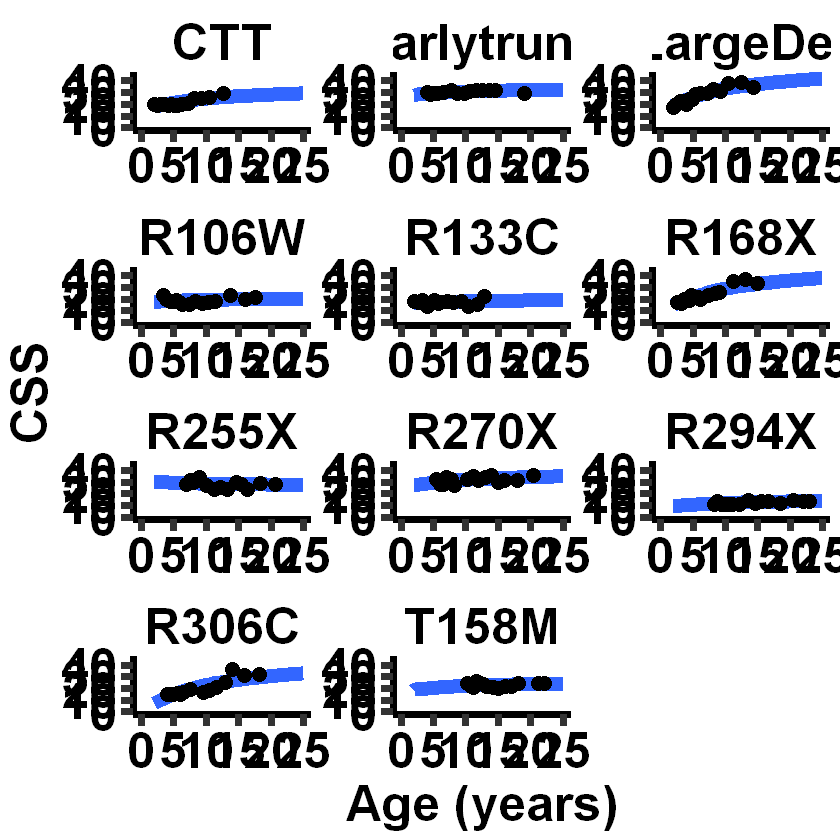

In [36]:
#plotting predicted versus actual for randomly selected individuals with > 13 visits

My_Theme = theme(
  axis.title.x = element_text(size = 30, face="bold", color = "black"),
  axis.text.x = element_text(size = 30, face="bold", color = "black"),
  axis.title.y = element_text(size = 30, face="bold", color = "black"),
  axis.text.y = element_text(size = 30, face="bold", color = "black"),  
  axis.line = element_line(size = 2),
  axis.ticks = element_line(size = 2),
  axis.ticks.length=unit(0.1,"inch"),    
  legend.text = element_text(size = 30, color = "black"),
  legend.title = element_blank())


checkid <- sample_multi$participant_id
predcheck <- all_pred %>% filter(participant_id %in% checkid)
realcheck <- mecp2_pos_decomp %>% filter(participant_id %in% checkid)


fitplot <- ggplot() +
geom_smooth(data = predcheck, aes(x = age, y = pred), show.legend = FALSE, size = 4 ) +
geom_point(data = realcheck, aes(x = age, y = total_score_clean), show.legend = FALSE, size = 4 ) +
theme_classic() +
My_Theme +
xlab("Age (years)") +
ylab("CSS") +
facet_wrap(~grouping3, nrow = 4, scales = "free") +
xlim(0,25) +
ylim(0,45) + 
theme(
  strip.background = element_blank(),
  strip.text.x = element_text(size = 30, face="bold", color = "black") #element_blank()
)

png(file="C:/Users/jkmer/Desktop/2023_css/fit2.png",
units="in", width=20, height=20, res=300)
fitplot
dev.off()

fitplot




## RMSE LOOE for model performance

In [37]:
#LOOE for model performance,
#Model input should be classic diagnosis, predictions are for all diagnosis
#make predictions for observed ages to save computational time
#calculate RMSE for all and by group
pred_input <- mecp2_decomp #set input for training model
participant_ids <- unique(mecp2_pos_decomp$participant_id) #reference diagnosis part_ids
rmse_pred = data.frame()

for (i in participant_ids){
        train <- subset(pred_input, participant_id != i) #train cannot include sample of interest
        test <- subset(mecp2_pos_decomp, participant_id == i) #pull single individual from all diagnosis
        time <- test$age
           if (length(time) == 1) {
                                time <- c(time,26)
                                } else {
                                        time <- time
                                                    }
    logtime <- log(time)
       
    #specify model   
    model_rep <- lme(fixed = total_score_clean ~ mean_lnage_ctr*duration*grp_3num, 
             random = ~duration|participant_id,
             data = train,
             correlation = corAR1(form = ~1|participant_id),
             method = "ML")  
        
    #create individual specific durations
        #filter all diagnosis for participant_id of interest
        tmp_new_dat <- mecp2_pos_decomp %>% filter(participant_id == i)
    
        #create vector of individual specific durations based on mean_lnage
        tmp_durations <- logtime - unique(tmp_new_dat$mean_lnage)
        
    
        tmp_pred <- IndvPred_lme(model_rep, 
                           newdata = test, 
                           timeVar = "duration", 
                           M = 500, 
                           return_data = TRUE,
                           seed = 321,
                           all_times = TRUE,
                           times = tmp_durations)
       
        rmse_pred <- rbind(rmse_pred, tmp_pred)
    
}

rmse_pred <- rmse_pred %>% filter(age != 26)

In [38]:
write.csv(rmse_pred, "C:/Users/jkmer/Desktop/2023_css/rmse_pred.csv", row.names = FALSE)

In [39]:
#calculate rmse
rmse <- rmse_pred %>% 
        group_by(participant_id) %>% 
        mutate(resid = pred - total_score_clean) %>%
        mutate(residsquare = resid^2) %>%
        mutate(mse = mean(residsquare)) %>%
        mutate(rmse = sqrt(mse))

png 
  2

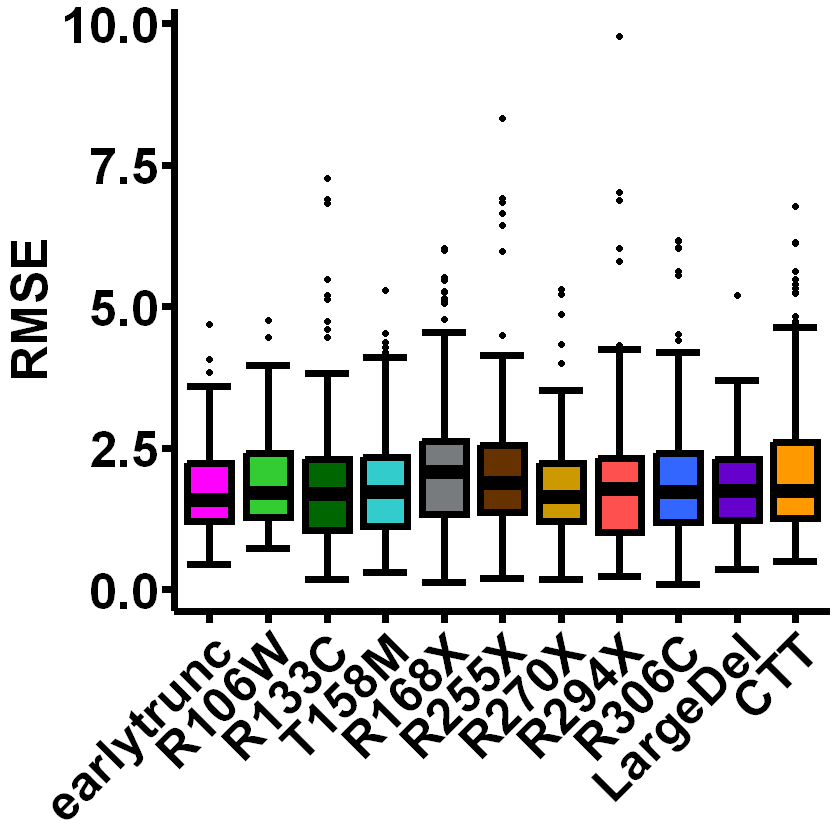

In [40]:
#plot rmse

My_Theme = theme(
  axis.title.x = element_blank(), #element_text(size = 20, face="bold", color = "black"),
  axis.text.x = element_text(size = 30, face="bold", color = "black", angle = 45, vjust = 1, hjust=1),
  axis.title.y = element_text(size = 30, face="bold", color = "black"),
  axis.text.y = element_text(size = 30, face="bold", color = "black"),  
  axis.line = element_line(size = 2, color = "black"),
  axis.ticks = element_line(size = 2, color = "black"),
  axis.ticks.length=unit(0.1,"inch"),    
  legend.position = "none")


rmse$grouping3 <- factor(rmse$grouping3, levels = c("earlytrunc",
                                 "R106W",
                                 "R133C",
                                 "T158M",
                                 "R168X",
                                 "R255X",
                                 "R270X",
                                 "R294X",
                                 "R306C",
                                 "LargeDel",
                                 "CTT"))  
level_order <- c("earlytrunc",
                                 "R106W",
                                 "R133C",
                                 "T158M",
                                 "R168X",
                                 "R255X",
                                 "R270X",
                                 "R294X",
                                 "R306C",
                                 "LargeDel",
                                 "CTT") 

rmseplot <- rmse %>% select(c(participant_id, grouping3, rmse)) %>%
         unique() %>%
         #filter(grouping3 != "LargeDel" & grouping3 != "earlytrunc" & grouping3 != "CTT") %>% 
         ggplot(aes(x=factor(grouping3, level = level_order), y=rmse, fill = grouping3)) + 
         stat_boxplot(geom ='errorbar', size = 2, color = "black") +
         geom_boxplot(size = 2, color = "black") +
         scale_fill_manual(values = testpal) +
         theme_classic() +
         My_Theme +
         ylab("RMSE")

png(file="C:/Users/jkmer/Desktop/2023_css/rmse2_allmut.png",
units="in", width=7, height=6, res=300)
rmseplot
dev.off()

rmseplot

## Calculate percentile distributions for mean pred score 
## for common cases, assign percentiles to all cases

In [41]:
#percentile calculation with mean predicted by individual
#pull mean predictions and separate common cases
all_mean_pred <- all_pred %>% unique()
all_mean_pred <- all_mean_pred %>% group_by(participant_id) %>% mutate(mean_pred = mean(pred)) 
all_mean_pred <- all_mean_pred %>% select(c(participant_id, grouping3, mean_pred)) %>% unique()
classic_mean_pred <- all_mean_pred %>% filter(participant_id %in% mecp2_decomp$participant_id)

In [42]:
write.csv(all_mean_pred, "C:/Users/jkmer/Desktop/2023_css/mean_pred.csv", row.names = FALSE)

In [43]:
#calculate and assign percentiles to predicted terminal values, based on cumulative distributions 
#of terminal values
#create dummy array (TotalScores) with all grouping3 and score combinations at age 25

Grouping3 <- c("R106W", 
               "R133C", 
               "T158M", 
               "R168X", 
               "R255X", 
               "R270X", 
               "R294X", 
               "R306C",
               "CTT",
               "LargeDel",
               "earlytrunc")
fitted <- seq(from = 1, to = 58, by = 1)

TotalScores = data.frame(fitted)

TotalScores_mut <- TotalScores %>% 
    group_by(fitted) %>% 
    tidyr::expand(Grouping3)

TotalScores_df <- as.data.frame(TotalScores_mut)


In [44]:
#for loop to calculate dummy array TotalScores_df percentiles 
#from cumulative dist. of predicted terminal values for common cases

scores_percentile = data.frame()

predictions <- classic_mean_pred

for (j in Grouping3) {
        pred_scores <- predictions[predictions$grouping3 == j ,]
        predict_fx <- ecdf(pred_scores$mean_pred)
        scores_restrict <- TotalScores_df[TotalScores_df$Grouping3 == j ,]
        scores_restrict$Percentile <- predict_fx(v = scores_restrict$fitted)
        rownames(scores_restrict) <- NULL
        # Using rbind() to append the output of one iteration to the dataframe
        scores_percentile = rbind(scores_percentile, scores_restrict)
        }
    
colnames(scores_percentile) = c( 'mean_pred', 'grouping3', 'Percentile')

In [45]:
#merge percentiles with predicted terminal scores
#round predicted values and percentiles to whole
scores_percentile$Percentile <- round(scores_percentile$Percentile, 2)
all_mean_pred$mean_pred <- round(all_mean_pred$mean_pred)
all_mean_pred$grouping3 <- as.factor(all_mean_pred$grouping3)
#assign percentiles to estimated terminal scores for all diagnosis
individual_percentiles <- merge(all_mean_pred, scores_percentile, by=c("mean_pred","grouping3")) %>%
                           unique()
#pull classic diagnosis percentiles
classic_percentiles <- individual_percentiles %>% filter(participant_id %in% mecp2_decomp$participant_id)

In [46]:
#export individual percentiles and all_mean_pred
write.csv(individual_percentiles, 
          "C:/Users/jkmer/Desktop/2023_css/percentiles.csv", row.names = FALSE)

In [47]:
classic_percentiles <- individual_percentiles %>% filter(participant_id %in% mecp2_decomp$participant_id)

Warning message:
"Removed 26 rows containing missing values (`geom_line()`)."


png 
  2

Warning message:
"Removed 26 rows containing missing values (`geom_line()`)."


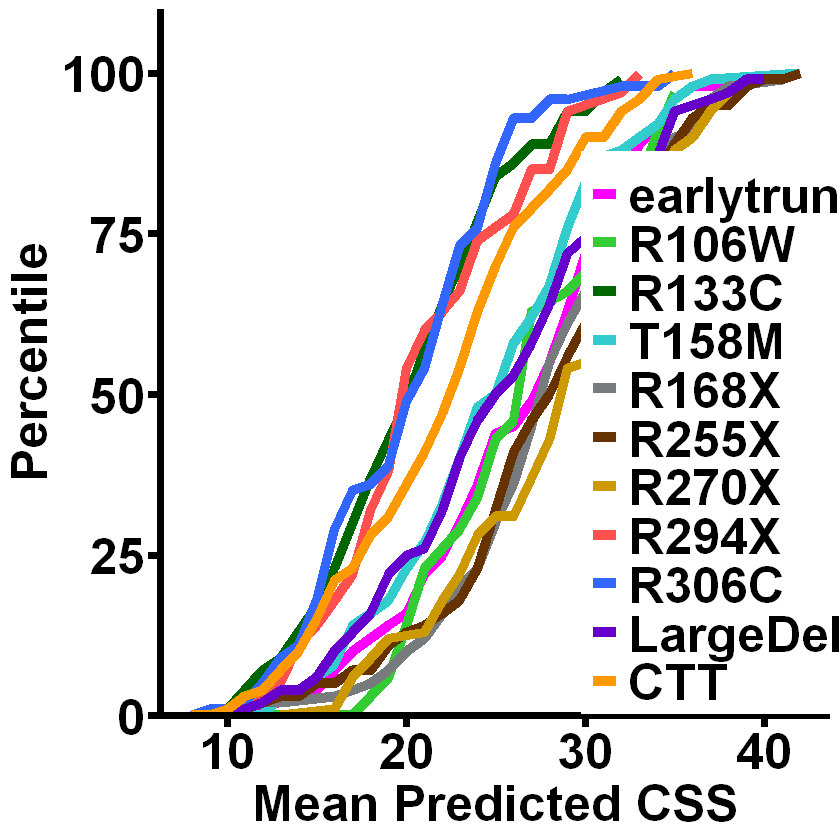

In [48]:
#plot cdf percentiles calculated from classic
My_Theme = theme(
  axis.title.x = element_text(size = 30, face="bold", color = "black"),
  axis.text.x = element_text(size = 30, face="bold", color = "black"),
  axis.title.y = element_text(size = 30, face="bold", color = "black"),
  axis.text.y = element_text(size = 30, face="bold", color = "black"),  
  axis.line = element_line(size = 2, color = "black"),
  axis.ticks = element_line(size = 2, color = "black"),
  legend.text = element_text(size = 30, face = "bold", color = "black"),
  axis.ticks.length=unit(0.1,"inch"),    
  legend.title = element_blank())


individual_percentiles$grouping3 <- factor(individual_percentiles$grouping3, levels = c("earlytrunc",
                                 "R106W",
                                 "R133C",
                                 "T158M",
                                 "R168X",
                                 "R255X",
                                 "R270X",
                                 "R294X",
                                 "R306C",
                                 "LargeDel",
                                 "CTT")) 


distplot <- individual_percentiles %>% 
        ggplot() +
            geom_line(aes(x = mean_pred, y = 100*Percentile, color = grouping3), size = 3) +
        labs(color='Mutation') + 
        ylab("Percentile") + 
        xlab("Mean Predicted CSS") +
        theme_classic() + 
        scale_color_manual(values = testpal) +
        My_Theme + 
        theme(legend.position = c(0.85, 0.4)) +
                scale_y_continuous(expand = c(0,0),
                     limits = c(0,110)) +
        xlim(8,42)

png(file="C:/Users/jkmer/Desktop/2023_css/distributions_allmut.png",
units="in", width=16, height=8, res=300)
distplot
dev.off()

distplot

## Anova for assessing separation of genotypes by predicted terminal score

In [49]:
#anova to check for grouping3 genotype separation in terminal scores "pred" in classic cases
#since groups are unbalanced, need to use Type III sums of squares
pred_aov <- Anova(lm(mean_pred~grouping3, data = classic_percentiles), type="III")
pred_aov

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),58344.300,1,1630.4338,1.255594e-211
grouping3,8604.818,10,24.0462,6.795048e-41
Residuals,35498.249,992,NA,NA


In [50]:
comparison <- HSD.test(lm(mean_pred~grouping3, data = classic_percentiles), "grouping3", group=TRUE)
comparison

$statistics
   MSerror  Df     Mean       CV
  35.78453 992 24.57527 24.34161

$parameters
   test    name.t ntr StudentizedRange alpha
  Tukey grouping3  11         4.562585  0.05

$means
           mean_pred      std   r Min Max  Q25  Q50   Q75
CTT         22.05000 6.058330 120  10  34 17.0 22.5 26.00
earlytrunc  26.11000 5.933801 100  13  38 22.0 27.0 30.00
LargeDel    25.25490 6.721749 102  11  40 20.0 25.5 29.00
R106W       26.51429 5.419851  35  18  35 22.0 26.0 32.00
R133C       20.12857 5.313154  70   9  32 16.0 20.0 24.00
R168X       27.69672 5.969467 122  10  42 24.0 27.0 32.00
R255X       27.72072 6.448638 111   9  41 24.0 28.0 33.00
R270X       28.25373 6.233690  67  13  40 23.5 29.0 32.50
R294X       20.83077 5.290230  65  12  33 17.0 20.0 24.00
R306C       19.98913 5.155802  92   9  35 16.0 20.5 23.25
T158M       24.68067 6.157444 119  12  42 21.0 25.0 29.00

$comparison
NULL

$groups
           mean_pred groups
R270X       28.25373      a
R255X       27.72072      a
R168

In [51]:
#calculate mean predictons standard error by genotype group
stderror <- function(x) sd(x)/sqrt(length(x))
mean_pred2 <- classic_percentiles %>% group_by(grouping3) %>% 
                                    mutate(mean = mean(mean_pred)) %>%
                                    mutate(sem = stderror(mean_pred)) %>%
                                    select(grouping3, mean, sem) %>%
                                    unique()

In [52]:
#reassign grouping letters in reverse for ease of presentation
groups <- comparison$groups
groups$grouping3 <- rownames(groups)
groups <- groups %>% select(c(groups, grouping3))
groups <- merge(groups, mean_pred2, by = "grouping3")
#groups$groups2 <- c('ab', 'bcd', 'bcd', 'bcd', 'a', 'cd', 'cd', 'd', 'a', 'a', 'bc')

In [53]:
#filters <- c('earlytrunc', 'LargeDel', 'CTT')
#groups <- groups %>% filter(!grouping3 %in% filters)
groups$groups2 <- c('a', 'bc', 'bc', 'bc', 'a', 'c', 'c', 'c', 'a', 'a', 'b')

In [54]:
groups

grouping3,groups,mean,sem,groups2
<chr>,<chr>,<dbl>,<dbl>,<chr>
CTT,c,22.05000,0.5530473,a
earlytrunc,ab,26.11000,0.5933801,bc
LargeDel,ab,25.25490,0.6655523,bc
R106W,ab,26.51429,0.9161221,bc
R133C,c,20.12857,0.6350434,a
R168X,a,27.69672,0.5404501,c
R255X,a,27.72072,0.6120776,c
R270X,a,28.25373,0.7615664,c
R294X,c,20.83077,0.6561723,a


png 
  2

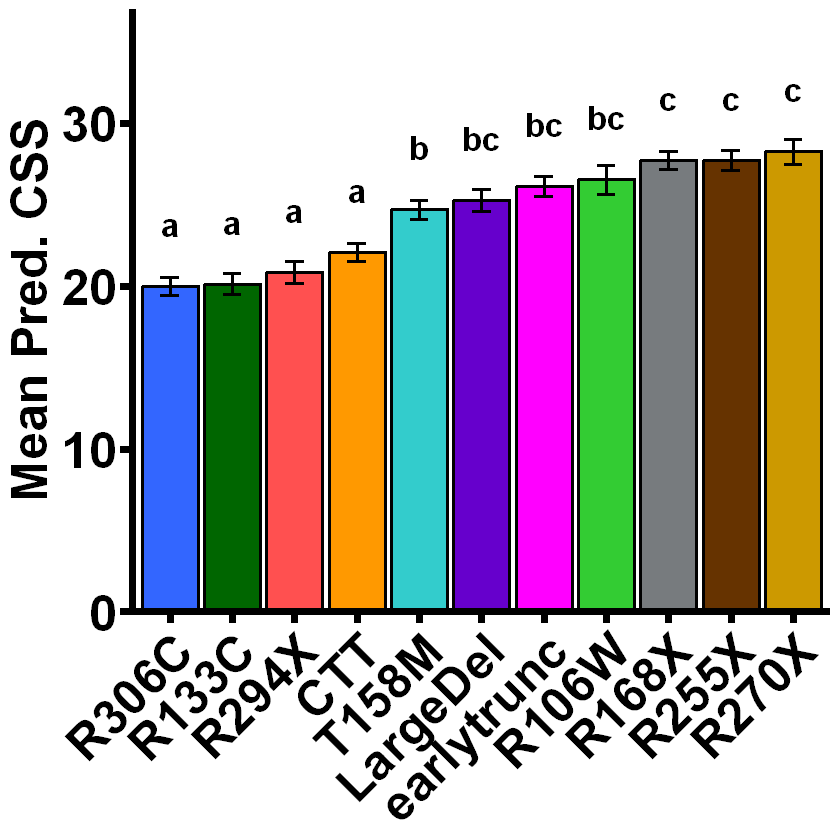

In [55]:
#plot mean predictions

My_Theme = theme(
  axis.title.x = element_blank(), #element_text(size = 20, face="bold", color = "black"),
  axis.text.x = element_text(size = 30, face="bold", color = "black", angle = 45, vjust = 1, hjust=1),
  axis.title.y = element_text(size = 30, face="bold", color = "black"),
  axis.text.y = element_text(size = 30, face="bold", color = "black"),  
  axis.line=element_line(size = 2, color = "black"),
  axis.ticks = element_line(size = 2, color = "black"),
  axis.ticks.length=unit(0.1,"inch"),    
  legend.position = "none")

groups$grouping3 <- factor(groups$grouping3, levels = c("earlytrunc",
                                 "R106W",
                                 "R133C",
                                 "T158M",
                                 "R168X",
                                 "R255X",
                                 "R270X",
                                 "R294X",
                                 "R306C",
                                 "LargeDel",
                                 "CTT")) 

meanplot <- ggplot(groups, aes(reorder(grouping3,mean), mean, fill = grouping3)) + 
      geom_bar(stat = "identity", color = "black", size=1, width=0.9) +
      #stat_summary(fun=mean, geom="bar") +
      geom_errorbar(aes(ymin=mean-sem, ymax=mean+sem), width=.3, size=1) +
      scale_y_continuous(expand = c(0,0),
                     limits = c(0,37)) +
          ylab("Mean Pred. CSS") +
          theme_classic() +
          scale_fill_manual(values = testpal) +
          My_Theme +
        geom_text(aes(label = groups2, fontface = "bold"), vjust = -2, size = 7)


png(file="C:/Users/jkmer/Desktop/2023_css/mean_pred_allmut.png",
units="in", width=8, height=8, res=300)
meanplot
dev.off()

meanplot

In [56]:
#heatplot to show comparisons in mean prediction
comparison <- HSD.test(lm(mean_pred~grouping3, data = classic_percentiles), "grouping3", group=FALSE)
pvals <- comparison$comparison %>% select(pvalue)

In [57]:
pvals$comp <- rownames(pvals)
pvals <- pvals %>%  mutate(signif = case_when(pvalue < 0.001 ~ '< 0.001',
  pvalue < 0.01 ~ '< 0.01',
  pvalue < 0.05 ~ '< 0.05',
  pvalue > 0.05 ~ '1'))
pvals <- separate(data = pvals, col = comp, into = c("A", "B"), sep = " - ")
pvals2 <- pvals
colnames(pvals2) <- c('pvalue', 'B', 'A', "signif")
pvals <- rbind(pvals, pvals2)


In [58]:
pvals

,pvalue,A,B,signif
,<dbl>,<chr>,<chr>,<chr>
CTT - earlytrunc,0.0000,CTT,earlytrunc,< 0.001
CTT - LargeDel,0.0036,CTT,LargeDel,< 0.01
CTT - R106W,0.0052,CTT,R106W,< 0.01
CTT - R133C,0.5517,CTT,R133C,1
CTT - R168X,0.0000,CTT,R168X,< 0.001
CTT - R255X,0.0000,CTT,R255X,< 0.001
CTT - R270X,0.0000,CTT,R270X,< 0.001
CTT - R294X,0.9647,CTT,R294X,1
CTT - R306C,0.3139,CTT,R306C,1


Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


png 
  2

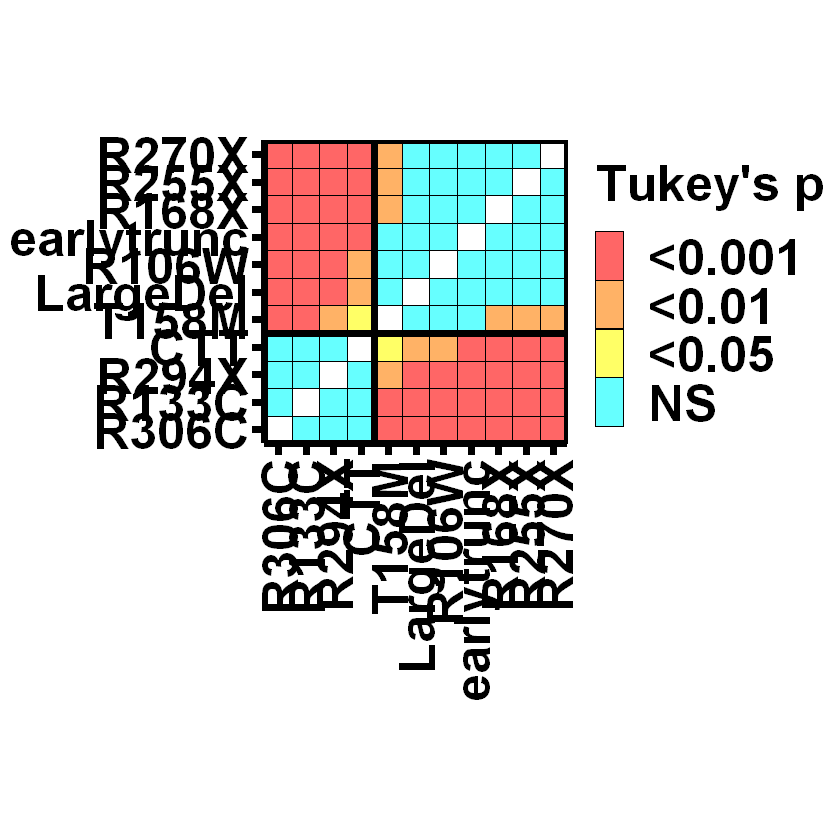

In [59]:
#plot pairwise comparisons
My_Theme = theme(
  axis.title.x = element_blank(), #element_text(size = 20, face="bold", color = "black"),
  axis.text.x = element_text(size = 30, face = "bold", color = "black", angle = 90, vjust = 0.5, hjust=1),
  axis.title.y = element_blank(),
  axis.text.y = element_text(size = 30, face = "bold", color = "black"),  
  axis.line=element_line(size = 2, color = "black"),
  axis.ticks = element_line(size = 2, color = "black"),
  axis.ticks.length=unit(0.1,"inch"),    
  legend.text = element_text(size=30, face = "bold", color = "black"),
  legend.title = element_text(size = 30, face = "bold", color = "black"))

level_order <- c('R306C',
                 'R133C',
                 'R294X',
                 'CTT',
                 'T158M',
                 'LargeDel',
                 'R106W',
                 'earlytrunc',                 
                 'R168X',
                 'R255X',
                 'R270X')



pvalplot <- pvals %>%
 ggplot(aes(x = factor(A, level = level_order), y = factor(B, level = level_order), fill = signif)) +
 geom_tile(color = "black") +
theme_classic() +
My_Theme +
 scale_x_discrete(expand=c(0.02,0)) +
 scale_y_discrete(expand=c(0.02,0)) +
scale_fill_manual(values = c("#FF6666", "#FFB266", "#FFFF66", "#66FFFF"),
                              name = "Tukey's p", 
                              labels = c('<0.001', '<0.01', '<0.05', 'NS')) +
coord_equal() +
theme(panel.border=element_rect(fill = NA, colour='black', size=2)) +
annotate("rect", xmin=c(0.5, 4.5), 
                 xmax=c(4.5, 11.5), 
                 ymin=c(0.5, 4.5), 
                 ymax=c(4.5, 11.5), colour="black", fill="transparent", size=2)

png(file="C:/Users/jkmer/Desktop/2023_css/pvalues_allmut.png",
units="in", width=9, height=9, res=300)
pvalplot
dev.off()

pvalplot


## Distribution of percentiles to show collapsing of genotype - phenotype in the nCSS score

In [60]:
#calculate and assign percentiles to predicted terminal values, based on cumulative distributions 
#of terminal values
#create dummy array (TotalScores) with all grouping3 and score combinations at age 25

Grouping3 <- c("R106W", 
               "R133C", 
               "T158M", 
               "R168X", 
               "R255X", 
               "R270X", 
               "R294X", 
               "R306C",
               "CTT",
               "LargeDel",
               "earlytrunc")
fitted <- seq(from = 0, to = 1, by = 0.01)

TotalScores = data.frame(fitted)

TotalScores_mut <- TotalScores %>% 
    group_by(fitted) %>% 
    tidyr::expand(Grouping3)

TotalScores_df <- as.data.frame(TotalScores_mut)


In [61]:
#for loop to calculate dummy array TotalScores_df percentiles 
#from cumulative dist. of predicted terminal values for common cases

scores_percentile = data.frame()

predictions <- individual_percentiles

for (j in Grouping3) {
        pred_scores <- predictions[predictions$grouping3 == j ,]
        predict_fx <- ecdf(pred_scores$Percentile)
        scores_restrict <- TotalScores_df[TotalScores_df$Grouping3 == j ,]
        scores_restrict$Percentile <- predict_fx(v = scores_restrict$fitted)
        rownames(scores_restrict) <- NULL
        # Using rbind() to append the output of one iteration to the dataframe
        scores_percentile = rbind(scores_percentile, scores_restrict)
        }
    
colnames(scores_percentile) = c( 'Percentile', 'grouping3', 'Percentile2')

In [62]:
#assign percentiles to estimated terminal scores for all diagnosis
individual_percentiles2 <- merge(individual_percentiles, scores_percentile, by=c("Percentile","grouping3")) %>%
                           unique()


png 
  2

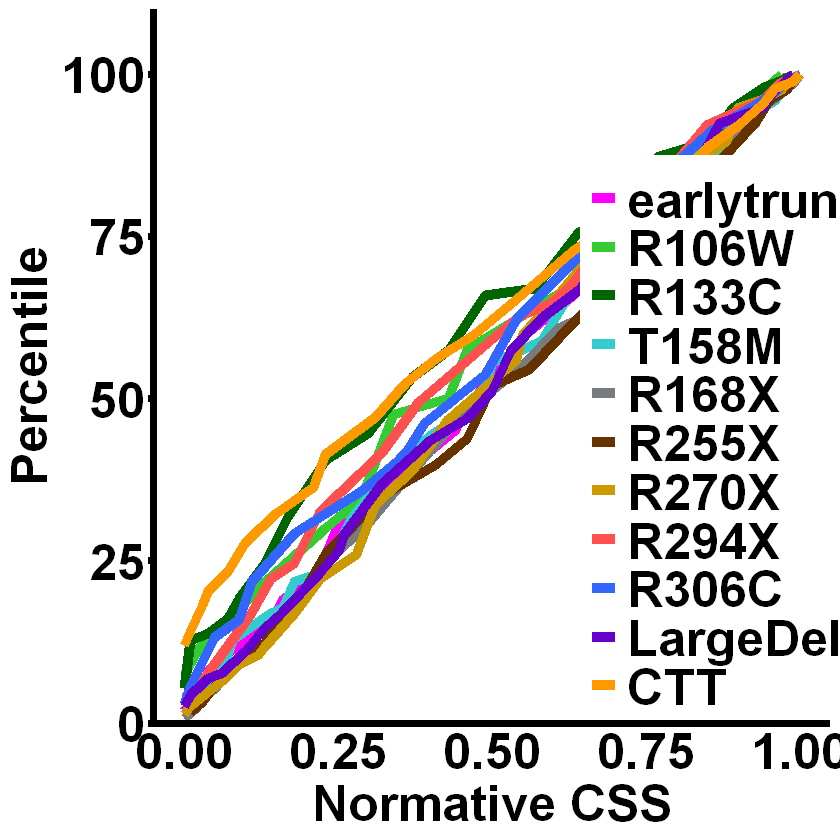

In [63]:
#plot cdf percentiles calculated from common percentiles
My_Theme = theme(
  axis.title.x = element_text(size = 30, face="bold", color = "black"),
  axis.text.x = element_text(size = 30, face="bold", color = "black"),
  axis.title.y = element_text(size = 30, face="bold", color = "black"),
  axis.text.y = element_text(size = 30, face="bold", color = "black"),  
  axis.line = element_line(size = 2, color = "black"),
  axis.ticks = element_line(size = 2, color = "black"),
  legend.text = element_text(size = 30, face = "bold", color = "black"),
  legend.title = element_blank())#element_text(size = 20, face="bold", color = "black"))


individual_percentiles2$grouping3 <- factor(individual_percentiles2$grouping3, levels = c("earlytrunc",
                                 "R106W",
                                 "R133C",
                                 "T158M",
                                 "R168X",
                                 "R255X",
                                 "R270X",
                                 "R294X",
                                 "R306C",
                                 "LargeDel",
                                 "CTT")) 


distplot <- individual_percentiles2 %>% 
        #filter(grouping3 != "LargeDel" & grouping3 != "earlytrunc" & grouping3 != "CTT") %>% 
        ggplot() +
            #geom_point(aes(x = pred, y = Percentile, color = grouping3)) +
            geom_line(aes(x = Percentile, y = 100*Percentile2, color = grouping3), size = 3) +
        labs(color='Mutation') + 
        ylab("Percentile") + 
        xlab("Normative CSS") +
        theme_classic() + 
        scale_color_manual(values = testpal) +
        My_Theme + 
        theme(legend.position = c(0.85, 0.4)) +
                scale_y_continuous(expand = c(0,0),
                     limits = c(0,110))# +
       # xlim(0,120)

png(file="C:/Users/jkmer/Desktop/2023_css/distributions_allmut_percentiles.png",
units="in", width=16, height=8, res=300)
distplot
dev.off()

distplot